# Scatterplot of lap times across 2025 sessions

This is an exploration of lap times, and tire types, for pre-race sessions (practice and qualification) for the 2025
China Grand Prix.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver = 'PIA'
race = 'China'
season = 2025

In [2]:
# Get FP1 data
fp1 = fastf1.get_session(season, race, 'FP1')
fp1.load()
fp1_laps = fp1.laps.pick_quicklaps().reset_index()

# Get sprint quali data
sq = fastf1.get_session(season, race, 'SQ')
sq.load()
sq_laps = sq.laps.pick_quicklaps().reset_index()

# Get sprint data
s = fastf1.get_session(season, race, 'S')
s.load()
s_laps = s.laps.pick_quicklaps().reset_index()

# Get quali data
q = fastf1.get_session(season, race, 'Q')
q.load()
q_laps = q.laps.pick_quicklaps().reset_index()


req         WARNING 	DEFAULT CACHE ENABLED! (1.45 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Chinese Grand Prix - Practice 1 [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           IN

In [3]:
print(f"FP1: {fp1_laps['LapTime'].min()}   {fp1_laps['LapTime'].max()}")
print(f"SQ:  {sq_laps['LapTime'].min()}   {sq_laps['LapTime'].max()}")
print(f"S:   {s_laps['LapTime'].min()}   {s_laps['LapTime'].max()}")
print(f"Q:   {q_laps['LapTime'].min()}   {q_laps['LapTime'].max()}")

FP1: 0 days 00:01:31.504000   0 days 00:01:37.883000
SQ:  0 days 00:01:30.849000   0 days 00:01:33.774000
S:   0 days 00:01:35.399000   0 days 00:01:41.825000
Q:   0 days 00:01:30.641000   0 days 00:01:36.706000


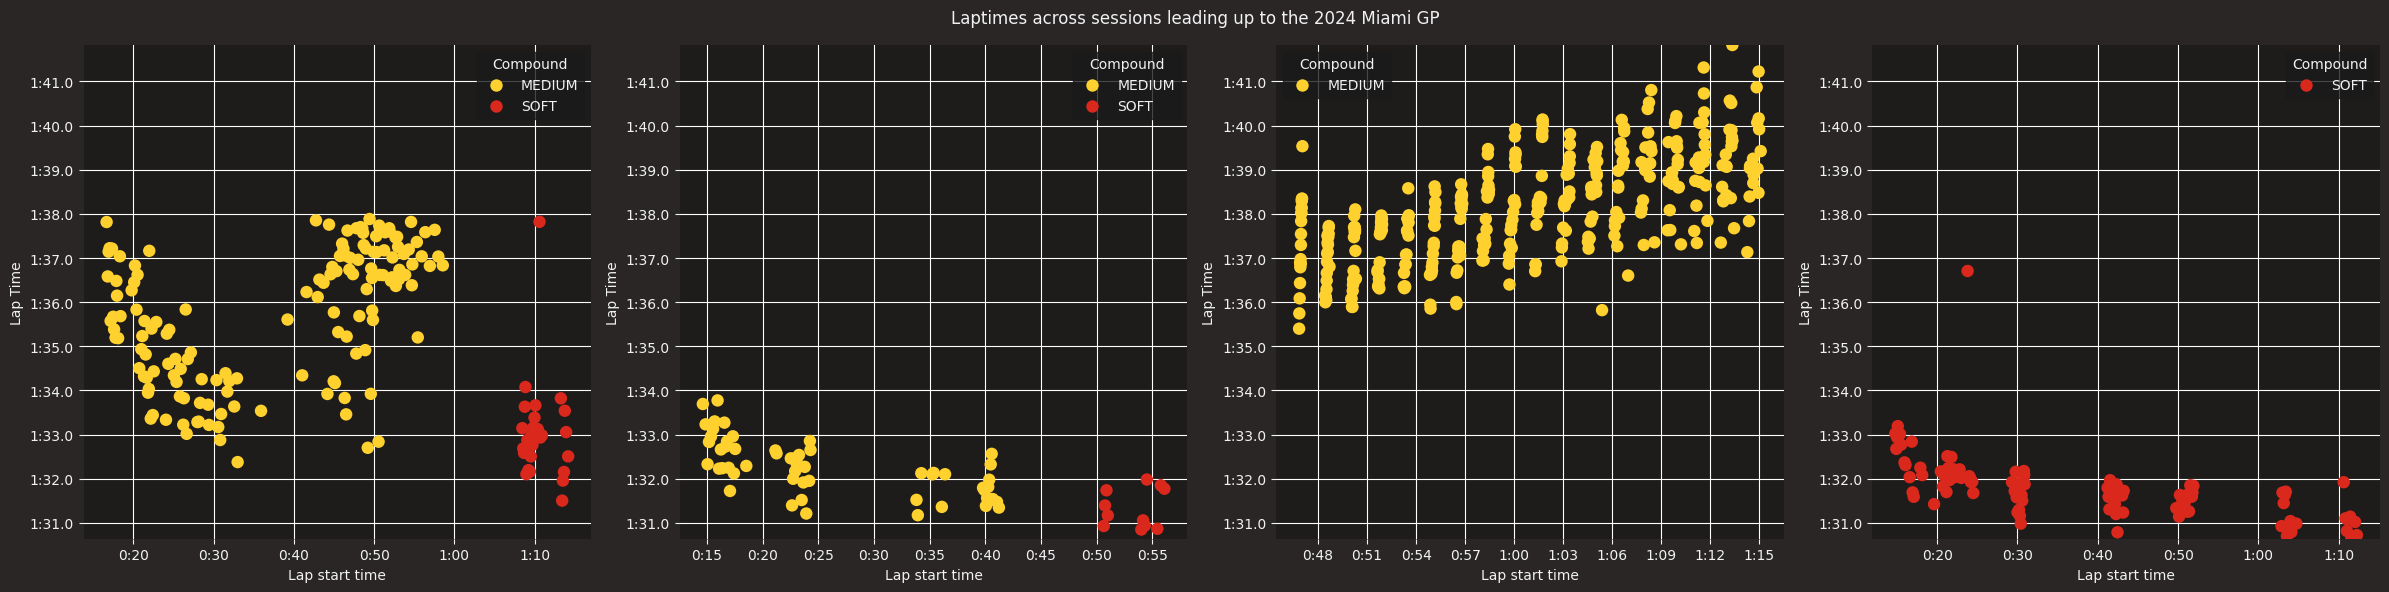

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
fig.suptitle('Lap times in practice and qualification for 2024 Miami GP')

sns.scatterplot(data=fp1_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp1),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=sq_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=sq),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=s_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax3,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=s),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=q_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax4,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=q),
                s=80,
                linewidth=0,
                legend='auto'
)

# Set common y-axis limits
common_ylim = (s_laps['LapTime'].max(), q_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)
ax3.set_ylim(common_ylim)
ax4.set_ylim(common_ylim)

ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax3.set_xlabel("Lap start time")
ax3.set_ylabel("Lap Time")

ax4.set_xlabel("Lap start time")
ax4.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

plt.suptitle("Laptimes across sessions leading up to the 2024 Miami GP")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')
ax4.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

---

This is the end of the notebook.